# Template Notebook

## Setup

### Standard library imports

In [1]:
%load_ext autoreload

In [2]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

### Standard library imports

### Thrid Party libraries imports

In [42]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
from scipy.stats import cumfreq

### Modules imports

In [38]:
%autoreload 2

from source.generators import random_distribution

### Paths

In [29]:
def triangle_distribution(x):
    if x > -1 and x < 0:
        return x + 1
    if x > 0 and x < 1:
        return -x + 1
    
    return 0

In [30]:
t = np.linspace(-5, 5, 10_000)

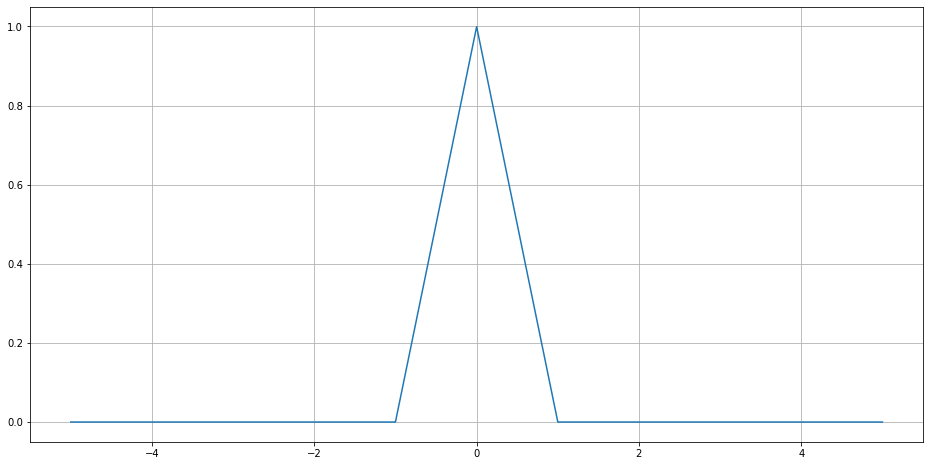

In [31]:
figure = plt.figure(figsize=(16, 8))

plt.plot(t, [triangle_distribution(point) for point in t])

plt.grid()

In [48]:
dist_array = random_distribution(10_000, 'uniform')

In [77]:
def get_cdf(distribution):
    return np.array([integrate.quad(distribution[:point])[0] for point in range(distribution.shape[0])])

In [61]:
def get_random_variable_from_dist(n_points, distribution: np.array):
    cdf = get_cdf(distribution)  # cumulative distribution 
    x_values = np.random.randint(0, 10_000, n_points)
    
    return cdf[x_values]

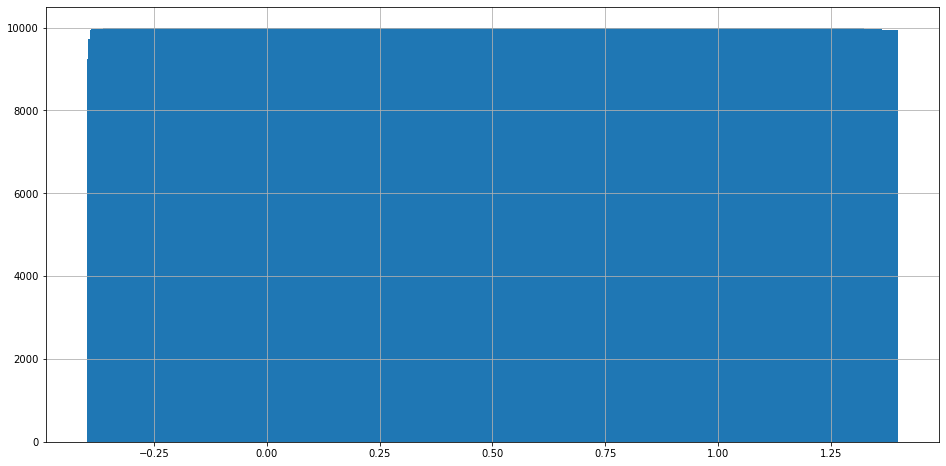

In [65]:
plt.figure(figsize=(16, 8))

plt.bar(dist_array, get_random_variable_from_dist(10_000, dist_array))

plt.grid()

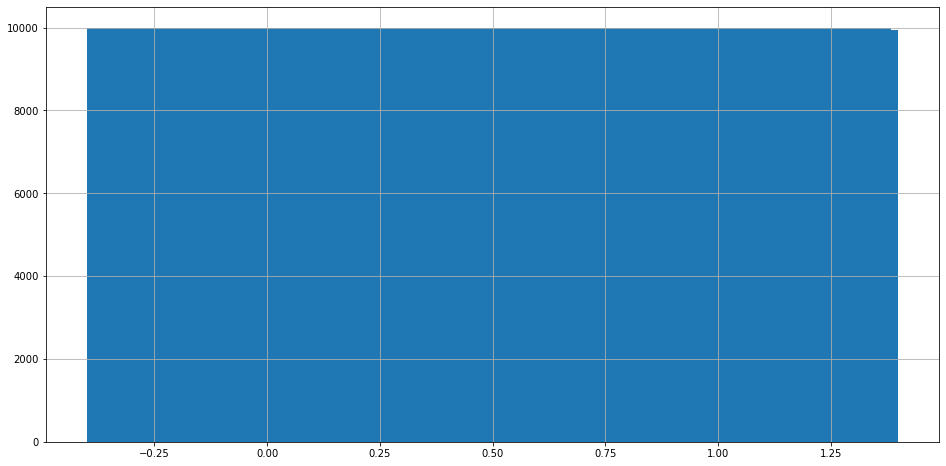

In [72]:
plt.figure(figsize=(16, 8))

plt.bar(np.array([triangle_distribution(point) for point in t]),
        get_random_variable_from_dist(10_000, np.array([triangle_distribution(point) for point in t])))

plt.grid()

In [78]:
plt.plot(get_cdf(np.array([triangle_distribution(point) for point in t])))

TypeError: quad() missing 2 required positional arguments: 'a' and 'b'

In [79]:
print(integrate.quad.__doc__)


    Compute a definite integral.

    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.

    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.

        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::

            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)

        The ``user_data`` is the data contained in the `scipy.LowLevelCallable`.
        In the call forms with ``xx``,  ``n`` is the length of the ``xx``
        array which contains ``xx[0] == x`` and the rest of the items are
        numbers contained in the ``ar